<a href="https://colab.research.google.com/github/codewithnickkk/Machine-Learning/blob/main/First_MachineLearning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import mean_squared_error , r2_score

# Actual values
y_true = [3.0, -0.5, 2.0, 7.0]

# Predicted values
y_pred = [5.1, 0.5, 2.3, 7.4]

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_true, y_pred)
print("R-squared:", r2)


Mean Squared Error: 1.4149999999999996
R-squared: 0.8060813704496789


## **First ML Project**

## **Load Data**

In [4]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **Data Preparation**

### **Data Separation as X and Y**

In [5]:
y = df['logS'] #we will consider this as the output Eg: y = f(x)
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [6]:
x = df.drop('logS', axis = 1) #drop fuction drops the given column or row and keeps rest table intact, axis = 1 is for column
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### **Data Spitting into Training Set and Test Set**

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [ ]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     MolLogP    MolWt  NumRotatableBonds  AromaticProportion
107  3.14280  112.216                5.0            0.000000
378 -2.07850  142.070                0.0            0.000000
529 -0.47730  168.152                0.0            0.000000
546 -0.86740  154.125                0.0            0.000000
320  1.62150  100.161                2.0            0.000000
..       ...      ...                ...                 ...
802  3.00254  250.301                1.0            0.842105
53   2.13860   82.146                3.0            0.000000
350  5.76304  256.348                0.0            0.900000
79   3.89960  186.339               10.0            0.000000
792  2.52334  310.297                3.0            0.300000

[915 rows x 4 columns]
      MolLogP    MolWt  NumRotatableBonds  AromaticProportion
822   2.91000  172.268                7.0            0.000000
118   7.27400  360.882                1.0            0.666667
347   1.94040  145.161                0.0            0.909

## **Model Building**

### **This Model is About Linear Regression**

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train) #we want to train model on given dataset

LinearRegression()

### **Applying the Model to Make Prediction**

In [16]:
#y is the output
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
print(y_lr_train_pred)
print(y_lr_test_pred)

## **Evaluate Model Performance**

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print(lr_train_mse)
print(lr_test_mse)
print(lr_train_r2)
print(lr_test_r2)

1.0075362951093687
1.0206953660861033
0.7645051774663391
0.7891616188563282


## **Result**

In [22]:
lr_results = pd.DataFrame (['Linear Regression', lr_train_mse, lr_test_mse, lr_train_r2, lr_test_r2]).transpose()
lr_results.columns = ['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2']
lr_results

,Model,Train MSE,Test MSE,Train R2,Test R2
0,Linear Regression,1.007536,1.020695,0.764505,0.789162


## **Introducing Second ML Model**

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(x_train, y_train)

RandomForestRegressor()

### **Applying the Model to Make Prediction**

In [19]:
#y is the output
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [ ]:
print(y_rf_train_pred)
print(y_rf_test_pred)

### **Evaluate Model Performance**

In [20]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
print(rf_train_mse)
print(rf_test_mse)
print(rf_train_r2)
print(rf_test_r2)

## **Result**

In [27]:
rf_results = pd.DataFrame (['Random Forest', rf_train_mse, rf_test_mse, rf_train_r2, rf_test_r2]).transpose()
rf_results.columns = ['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2']
rf_results

,Model,Train MSE,Test MSE,Train R2,Test R2
0,Random Forest,0.085469,0.649437,0.980023,0.86585


## **Final Result Compairing Both Models**

In [32]:
import pandas as pd
result = pd.concat([lr_results, rf_results], axis = 0)
result.reset_index(drop=True)


,Model,Train MSE,Test MSE,Train R2,Test R2
0,Linear Regression,1.007536,1.020695,0.764505,0.789162
1,Random Forest,0.085469,0.649437,0.980023,0.86585


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Train MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Test MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Train R2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Train MSE'].value_counts()
    for x_label, grp in _df_4.groupby('Model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Model')
_ = plt.ylabel('Train MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test MSE'].value_counts()
    for x_label, grp in _df_5.groupby('Train MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Train MSE')
_ = plt.ylabel('Test MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Train R2'].value_counts()
    for x_label, grp in _df_6.groupby('Test MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Test MSE')
_ = plt.ylabel('Train R2')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test R2'].value_counts()
    for x_label, grp in _df_7.groupby('Train R2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Train R2')
_ = plt.ylabel('Test R2')

### *results after compariring both models (regression model's linear regression and ensemble model's random forest) and Random forest seems to do better in all aspects*

## **Data Visualization of Prediction Results**

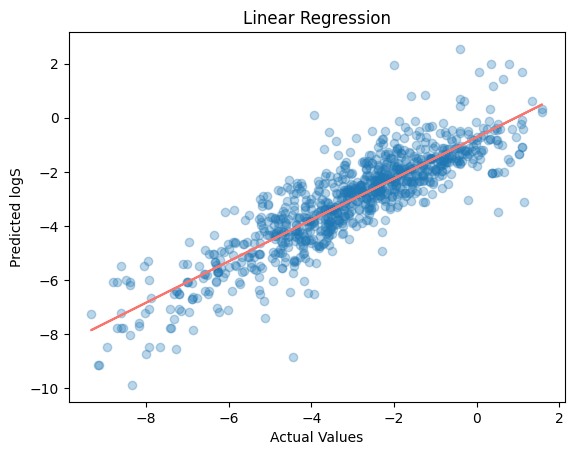

In [48]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x = y_train, y = y_lr_train_pred, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted logS')
plt.title('Linear Regression')

hyperline = np.polyfit(y_train, y_lr_train_pred, 1)
hl = np.poly1d(hyperline)
plt.plot(y_train, hl(y_train), '#F8766D' )
plt.show()